In [ ]:
import pandas as pd
import numpy as np
import math
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer 
from sklearn import linear_model
%matplotlib inline

In [ ]:
#1. WITH SKLEARN
X=np.array([0,1,2,3]).reshape((-1, 1))
Y=np.array([4,7,7,8])
model = LinearRegression().fit(X, Y)
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

X=np.array([0,1,2,3])
Y=np.array([4,7,7,8])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X, Y) #для доп проверки
print(slope, intercept, r_value**2, p_value, std_err)

#2. ONLY WITH NUMPY
X = [0,1,2,3]
Y = [4,7,7,8] 

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


rmse_val = rmse(np.array(X), np.array(Y))
print("rms error is: " + str(rmse_val))

X=np.array([0,1,2,3])
Y=np.array([4,7,7,8])
correlation_matrix = np.corrcoef(X, Y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("\n",r_squared, "\nОтвет. Все совпало") # ОТВЕТ


coefficient of determination: 0.8000000000000002
1.2 4.7 0.7999999999999999 0.10557280900008413 0.4242640687119286
rms error is: 5.049752469181039

 0.8000000000000002 
Ответ. Все совпало


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/Colab Notebooks/ML/Houses.csv

Mounted at /content/drive


# 2. Рассмотреть задачу прогнозирование цен на примере набора данных Houses.csv:

2.1 какие признаки наиболее всего влияют, по Вашему мнению, на цену?


***Площадь, этаж, год сдачи дома***

### Данные полученные далее

Чем ближе к единице тем выше зависимость:
Зависимость price от price              1.0              
Зависимость price от bedrooms      0.09507947467657651      
Зависимость price от bathrooms      0.27576939959239877      
Зависимость price от sqft_living       0.4928532179037931      
Зависимость price от sqft_lot       0.0080390699212195      
Зависимость price от floors      0.06594310068341092      
Зависимость price от waterfront      0.07095267538578309      
Зависимость price от view      0.15784211584121532      
Зависимость price от condition     0.0013221797086615528     
Зависимость price от grade      0.44546848610928724      
Зависимость price от sqft_above      0.36671175283827917      
Зависимость price от sqft_basement       0.104856815269744       
Зависимость price от yr_built      0.002917245534412971     
Зависимость price от yr_renovated      0.015985504123854355     
Зависимость price от zipcode      0.00283054370548963      
Зависимость price от lat      0.09425113672917462      
Зависимость price от long     0.00046769430149007363    
Зависимость price от sqft_living15       0.3426684607560172      
Зависимость price от sqft_lot15      0.006797532958571217     


('Max Зависимость price от sqft_living', '      0.4928532179037931      ') 

In [ ]:
#Что можно удалить ? - удалить id, undefined: 0, data, condition, yr_built, zipcode
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Houses.csv') 
df = pd.DataFrame(data = data) 
df = df.drop(df.columns[[0,1,2,11,15,17]], axis=1)
price = df.price
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,0,47.6168,-122.045,1800,7503


In [ ]:
#2.3 ПРОПУСКИ ОТСУТСТВУЮТ
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,7.656873,1788.390691,291.509045,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,1.175459,828.090978,442.575043,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
for i in df.head(0):
  print(f"column {i}")
  print(f"NaN values for the column {i}:", df[i].isnull().sum())
  print(f"max value for the column {i}:", df[i].max())
  print(f"min value for the column {i}:", df[i].min(),"\n")

column price
NaN values for the column price: 0
max value for the column price: 7700000.0
min value for the column price: 75000.0 

column bedrooms
NaN values for the column bedrooms: 0
max value for the column bedrooms: 33
min value for the column bedrooms: 0 

column bathrooms
NaN values for the column bathrooms: 0
max value for the column bathrooms: 8.0
min value for the column bathrooms: 0.0 

column sqft_living
NaN values for the column sqft_living: 0
max value for the column sqft_living: 13540
min value for the column sqft_living: 290 

column sqft_lot
NaN values for the column sqft_lot: 0
max value for the column sqft_lot: 1651359
min value for the column sqft_lot: 520 

column floors
NaN values for the column floors: 0
max value for the column floors: 3.5
min value for the column floors: 1.0 

column waterfront
NaN values for the column waterfront: 0
max value for the column waterfront: 1
min value for the column waterfront: 0 

column view
NaN values for the column view: 0
max

## 2.4 **можно** ли обойтись одним параметром? выберите один и решите задачу



1.   sqft_living: площадь самого дома
2.   sqft_lot: площадь территории вместе с домом




In [ ]:
lm = LinearRegression()

max = 0
Y = price
print("Чем ближе к единице тем выше зависимость:")
for i in df.head(0):
  X = df[[i]]
  lm.fit(X,Y)
  score = lm.score(X,Y)
  if max < score and score != 1:
    max = score
    f = f"Max Зависимость price от {i}", "{:^30}".format(score)
  print(f"Зависимость price от {i}", "{:^30}".format(score))
print("\n",100*"#",f"\n{f}","\n",100*"#")


Чем ближе к единице тем выше зависимость:
Зависимость price от price              1.0              
Зависимость price от bedrooms      0.09507947467657651      
Зависимость price от bathrooms      0.27576939959239877      
Зависимость price от sqft_living       0.4928532179037931      
Зависимость price от sqft_lot       0.0080390699212195      
Зависимость price от floors      0.06594310068341092      
Зависимость price от waterfront      0.07095267538578309      
Зависимость price от view      0.15784211584121532      
Зависимость price от grade      0.44546848610928724      
Зависимость price от sqft_above      0.36671175283827917      
Зависимость price от sqft_basement       0.104856815269744       
Зависимость price от yr_renovated      0.015985504123854355     
Зависимость price от lat      0.09425113672917462      
Зависимость price от long     0.00046769430149007363    
Зависимость price от sqft_living15       0.3426684607560172      
Зависимость price от sqft_lot15      0.006

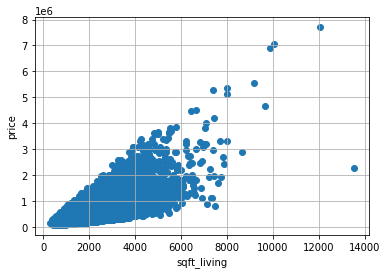

In [ ]:
tg242 = df.sqft_living
plt.scatter(tg242, price);
plt.ylabel("price")
plt.xlabel("sqft_living")    
plt.grid()           

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Houses.csv') 
df = pd.DataFrame(data = data) 
df = df.drop(df.columns[[0,1,2,11,15,17]], axis=1)

lis=list(df.keys())
print(lis,"\n")

for i in range(len(lis)-2):
  for j in range(i,len(lis)-2):
    X=df[[lis[i]]]
    Y=df[[lis[j+1],lis[j+2]]]
    regr = linear_model.LinearRegression()
    model=regr.fit(X, Y)
    print(f"Строим регрессию между {lis[i]} и {lis[j+1]} + {lis[j+2]}")
    print(model.score(X, Y),"\n")

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 

Строим регрессию между price и bedrooms + bathrooms
0.1854244371344953 

Строим регрессию между price и bathrooms + sqft_living
0.38431130874809827 

Строим регрессию между price и sqft_living + sqft_lot
0.25044614391250924 

Строим регрессию между price и sqft_lot + floors
0.03699108530231476 

Строим регрессию между price и floors + waterfront
0.06844788803459989 

Строим регрессию между price и waterfront + view
0.11439739561350076 

Строим регрессию между price и view + grade
0.30165530097524745 

Строим регрессию между price и grade + sqft_above
0.4060901194737804 

Строим регрессию между price и sqft_above + sqft_basement
0.23578428405400537 

Строим регрессию между price и sqft_basement + yr_renovated
0.06042115969679834 

Строим регрессию между price и yr_renovated + lat
0.0551183204